In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{68}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{70}/metrics.csv')

#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{72}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{87}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{96}/metrics.csv')



In [22]:
the_dir = "example_results/lightning_logs/tmp_testi_oct/version_21"

df = pd.read_csv(os.path.join(the_dir, 'metrics.csv'))
df

,step,val_f1,epoch,val_prec,val_loss,lr-SGD,val_acc,val_cc,train_cc,train_f1,unpruned,unpruned_state,train_loss,train_acc,train_prec
0,0,NaN,NaN,NaN,NaN,0.00100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,0.623846,0.0,0.313580,1.047037,NaN,0.623846,4.800539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.800539,0.525538,5980.0,-1.0,1.260884,0.525538,0.262804
3,102,NaN,NaN,NaN,NaN,0.00100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,203,0.725385,1.0,0.360567,0.853922,NaN,0.725385,4.800539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10097,0.806154,98.0,0.681304,0.578509,NaN,0.806154,4.955155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,10097,NaN,98.0,NaN,NaN,NaN,NaN,NaN,4.955155,0.805615,2974.0,-1.0,0.564877,0.805615,0.658986
297,10098,NaN,NaN,NaN,NaN,0.00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,10199,0.806923,99.0,0.682667,0.578369,NaN,0.806923,4.955155,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
stream = open(os.path.join(the_dir, 'hparams.yaml'), 'r')
data = yaml.load(stream, Loader=yaml.Loader)
data

{'kwargs': {'model_kwargs': {'base_lr': 0.001,
   'cc_metric': 'l2',
   'cc_weight': 10,
   'ci_metric': 'l2',
   'criterion': CrossEntropyLoss(),
   'grid_size': 324,
   'lr_update': 100,
   'min_lr': 1e-05,
   'momentum': 0.9,
   'n_classes': 4,
   'optimizer': 'sgd',
   'out_dim': [1, 8, 16, 32, 4],
   'pretrain_epochs': 20,
   'prune_keep': 0.95,
   'prune_keep_total': 0.5,
   'update_every_nth_epoch': 4},
  'train_kwargs': {'batch_size': 128,
   'device': 'cuda',
   'epochs': 100,
   'exp_name': 'tmp_testi_oct',
   'img_size': 28,
   'load_ckpt_file': 'xversion_22/checkpoints/epoch=0-unpruned=10942-val_f1=0.06.ckpt',
   'log_every_n_steps': 4,
   'num_workers': 18,
   'result_path': 'examples/example_results',
   'test_size': 24,
   'train_size': 13000,
   'val_size': 1300}},
 'log_dir': 'examples/example_results\\lightning_logs\\tmp_testi_oct\\version_21'}

In [57]:
cc_metric = data['kwargs']['model_kwargs']['cc_metric']

In [58]:
ci_metric = data['kwargs']['model_kwargs']['ci_metric']

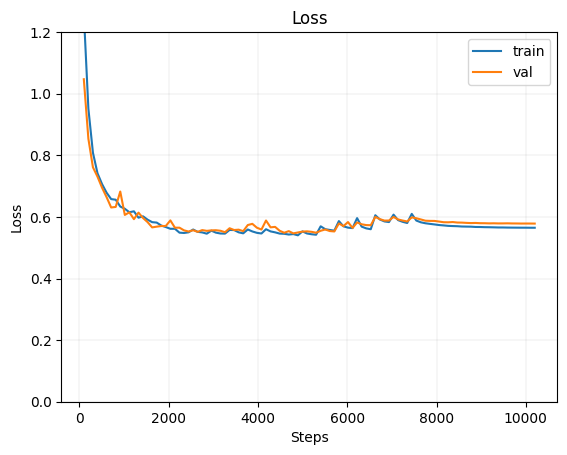

In [71]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_loss']

train_df = df[['step', 'train_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1.2])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_loss.png'))

# Show the plot
plt.show()



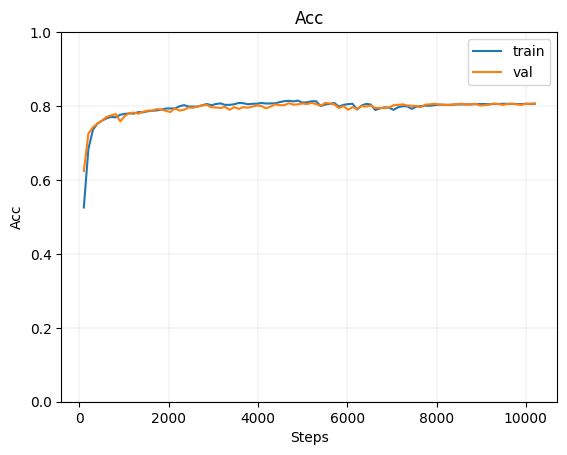

In [24]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_acc']].dropna()
x_val = val_df['step']
y_val = val_df['val_acc']

train_df = df[['step', 'train_acc']].dropna()
x_train = train_df['step']
y_train = train_df['train_acc']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Acc')
plt.title('Acc')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_acc.png'))


# Show the plot
plt.show()


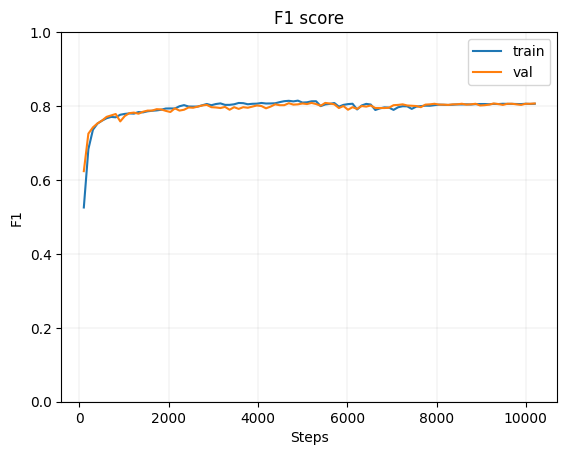

In [25]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_f1']].dropna()
x_val = val_df['step']
y_val = val_df['val_f1']

train_df = df[['step', 'train_f1']].dropna()
x_train = train_df['step']
y_train = train_df['train_f1']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('F1')
plt.title('F1 score')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_f1.png'))

# Show the plot
plt.show()


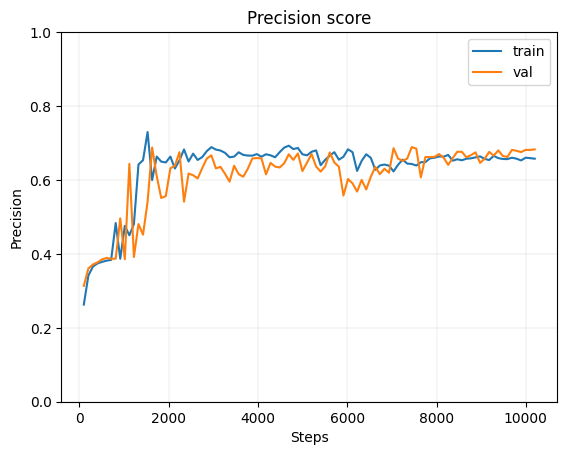

In [26]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_prec']].dropna()
x_val = val_df['step']
y_val = val_df['val_prec']

train_df = df[['step', 'train_prec']].dropna()
x_train = train_df['step']
y_train = train_df['train_prec']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Precision score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_prec.png'))


# Show the plot
plt.show()


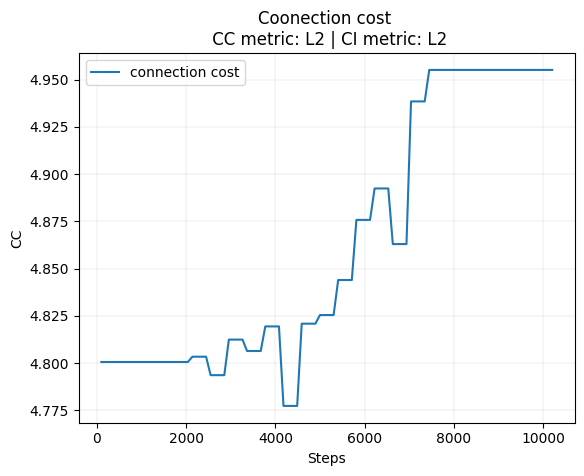

In [68]:
import matplotlib.pyplot as plt

train_df = df[['step', 'train_cc']].dropna()
x_train = train_df['step']
y_train = train_df['train_cc']


# Create a line plot
plt.plot(x_train, y_train, label="connection cost")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('CC')
plt.title(f'Coonection cost \n CC metric: {cc_metric.upper()} | CI metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_cc.png'))


# Show the plot
plt.show()


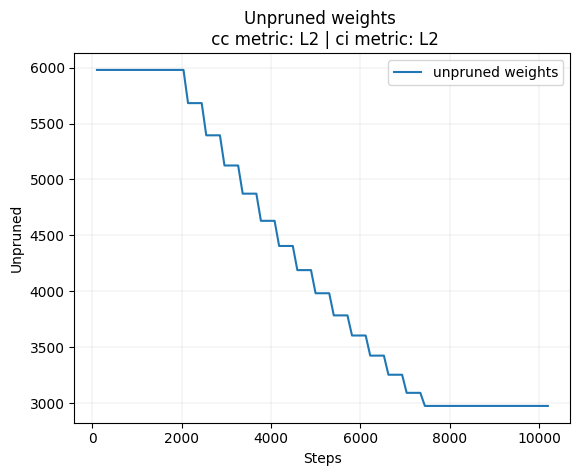

In [69]:
import matplotlib.pyplot as plt

train_df = df[['step', 'unpruned']].dropna()
x_train = train_df['step']
y_train = train_df['unpruned']


# Create a line plot
plt.plot(x_train, y_train, label="unpruned weights")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Unpruned')
plt.title(f'Unpruned weights \n cc metric: {cc_metric.upper()} | ci metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_unpruned.png'))


# Show the plot
plt.show()


In [29]:
val_df

,step,val_prec
1,101,0.313580
4,203,0.360567
7,305,0.371359
10,407,0.376889
13,509,0.385065
...,...,...
286,9791,0.678864
289,9893,0.675458
292,9995,0.681304
295,10097,0.681304


In [11]:
40*300

12000

In [12]:
list(set(df['step']))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97]

In [13]:
df['val_loss'].dropna()

1      3.857490
4      3.610391
7      3.460918
10     3.302623
13     3.144954
         ...   
280    2.120417
283    2.120333
286    2.120262
289    2.120200
292    2.120147
Name: val_loss, Length: 98, dtype: float64